# Capstone Project: The Battle of Neighborhoods
---

<img align=right src = "https://media-exp1.licdn.com/dms/image/C5603AQHpRRh29suwzw/profile-displayphoto-shrink_200_200/0?e=1596672000&v=beta&t=mBIZIVnnetK7sgtqajcjdNvvy9fuIwV9arer6lVFsCA" width = 80> </a>
## San Francisco Police Department Incident Reports: 2018 to Present(01/06/2020)
### Author : Jithin Prakash Kolamkolly
***

Police Department is collating data about the criminal incidents happening in and arounf San Francisco, that data is published in ‘The office of the chief Data Officer – City and County of San Francisco’ (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783) website. This data is directly pulled from the website to do modelling and to analyze the data

__CRISP DM__ methodology is used in analysis and prediction

* Collecting Data
* Explore and Understand Data
* Data Preparation and pre-processing
* Modelling
* Evaluation and testing

#### Importing Libraries
---

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.	Collect Data

**Importing Data from website (https://data.sfgov.org/api/views/wg3w-h783/rows.csv)**

In [0]:
!wget -q -O 'Police_incidents.csv' https://data.sfgov.org/api/views/wg3w-h783/rows.csv
print('Data fetched from website')

Data fetched from website


---
# 2.	Explore and Understand Data
Reading CSV to Data Frame and performing operations

In [0]:
#Reading from the CSV file to the data frame
df_Police = pd.read_csv('Police_incidents.csv')
#Printing the shape of the Raw Data
print('\nRaw data has %d Rows and %d Columns\n'% df_Police.shape)
#Displaying the first 5 rows
df_Police.head()


Raw data has 351980 Rows and 36 Columns



,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,NaN,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,II,Initial,NaN,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,24285000.0,Southern,South of Market,6.0,37.780535,-122.408161,"(37.7805353858225, -122.40816079455212)",32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,20447000.0,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,"(37.72159985216247, -122.39074534279013)",88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,IS,Initial Supplement,NaN,15041,Offences Against The Family And Children,Family Offenses,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876,"(37.794859532228344, -122.40487561154785)",104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,26583000.0,Northern,Marina,2.0,37.797716,-122.430559,"(37.79771621229674, -122.43055896140594)",15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [0]:
#Check for Duplicate Entries
df_Police.duplicated().sum()

0

In [0]:
#Check the details using describe method
df_Police.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
count,351980.000000,3.519800e+05,351980.000000,3.519800e+05,2.710930e+05,351980.000000,3.334430e+05,333443.000000,333443.000000,333443.000000,326297.000000,332951.000000,333373.000000,333307.000000,78138.000000,17384.000000,46651.0,4254.000000,3860.0,333307.000000
mean,2018.703597,7.770258e+10,777025.577675,1.886256e+08,1.891429e+08,25245.315418,2.534416e+07,5.947358,37.769701,-122.423521,52.599806,4.878030,6.654972,20.942509,2.361066,35.001266,1.0,24.227786,1.0,1.549637
std,0.699340,9.004964e+09,90049.643370,8.193018e+06,1.585375e+07,25865.116931,3.085363e+06,2.774245,0.023890,0.025960,32.507283,2.719015,3.357436,12.575261,1.374890,12.807821,0.0,6.023043,0.0,0.497531
min,2018.000000,6.186871e+10,618687.000000,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.0,1.000000
25%,2018.000000,6.993463e+10,699345.750000,1.807156e+08,1.821608e+08,6244.000000,2.400200e+07,3.000000,37.756887,-122.433735,23.000000,3.000000,3.000000,8.000000,1.000000,35.000000,1.0,23.000000,1.0,1.000000
50%,2019.000000,7.770976e+10,777097.500000,1.901901e+08,1.906543e+08,7053.000000,2.491600e+07,6.000000,37.776221,-122.417506,45.000000,5.000000,7.000000,20.000000,3.000000,35.000000,1.0,24.000000,1.0,2.000000
75%,2019.000000,8.549439e+10,854943.250000,1.909272e+08,1.927902e+08,61030.000000,2.641300e+07,8.000000,37.785893,-122.407272,86.000000,6.000000,10.000000,34.000000,3.000000,35.000000,1.0,24.000000,1.0,2.000000
max,2020.000000,9.326037e+10,932603.000000,9.811720e+08,1.000000e+09,75030.000000,5.412200e+07,11.000000,37.829991,-122.363743,117.000000,10.000000,11.000000,41.000000,5.000000,80.000000,1.0,31.000000,1.0,2.000000


---
# 3.	Data Preparation and Pre-processing
Refer the documentation for the Column Header / Feature / Attribute description

In [0]:
#Dropping the data that is not needed for the analysis
df_Police.drop(['Report Datetime','Row ID','Incident ID','Incident Number',
                'CAD Number','Report Type Code','Report Type Description','Filed Online','Incident Code',
                'Incident Subcategory','CNN','Supervisor District','point','SF Find Neighborhoods','Current Police Districts',
                'Current Supervisor Districts','Analysis Neighborhoods','HSOC Zones as of 2018-06-05','OWED Public Spaces',
                'Central Market/Tenderloin Boundary Polygon - Updated','Parks Alliance CPSI (27+TL sites)',
                'ESNCAG - Boundary File','Areas of Vulnerability, 2016'],axis=1,inplace=True)

#Printing the shape of the Processed Data
print('\nColumn Drop - Data has %d Rows and %d Columns'% df_Police.shape)

#Dropping the Rows that has NaN or Null values
df_Police.dropna(subset = ['Incident Datetime','Incident Date','Incident Time','Incident Year','Incident Day of Week',
                           'Incident Category','Incident Description','Resolution','Intersection',
                           'Police District','Analysis Neighborhood','Latitude','Longitude'],inplace=True,axis=0)

# Adding Month Column on to the DataFrame
df_Police.insert(3,'Incident Month',df_Police['Incident Date'].apply(lambda x: str(x.split("/")[1])))

#Printing the shape of the Processed Data
print('\nRow Drop - Data has %d Rows and %d Columns\n'% df_Police.shape)

df_Police.head()


Column Drop - Data has 351980 Rows and 13 Columns

Row Drop - Data has 333185 Rows and 14 Columns



,Incident Datetime,Incident Date,Incident Time,Incident Month,Incident Year,Incident Day of Week,Incident Category,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,05,2019,Wednesday,Offences Against The Family And Children,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,Taraval,Sunset/Parkside,37.762569,-122.499627
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,06,2019,Saturday,Non-Criminal,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,Southern,South of Market,37.780535,-122.408161
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,06,2019,Monday,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,Bayview,Bayview Hunters Point,37.721600,-122.390745
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,11,2018,Friday,Offences Against The Family And Children,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,Central,Chinatown,37.794860,-122.404876
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,05,2019,Monday,Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,Northern,Marina,37.797716,-122.430559


**Crimes per Category**

Lets check the number of crimes by category

In [0]:
df_category = pd.DataFrame(df_Police['Incident Category'].value_counts())
df_category=df_category.reset_index().rename(columns={'index' :'Incident Category','Incident Category':'Incident Count'})
df_category.head(15)

,Incident Category,Incident Count
0,Larceny Theft,100845
1,Other Miscellaneous,26326
2,Non-Criminal,21453
3,Assault,20712
4,Malicious Mischief,20516
5,Burglary,16200
6,Motor Vehicle Theft,13056
7,Warrant,12387
8,Fraud,10246
9,Lost Property,9955


Plotting the data to see the frequency  of all crime categories

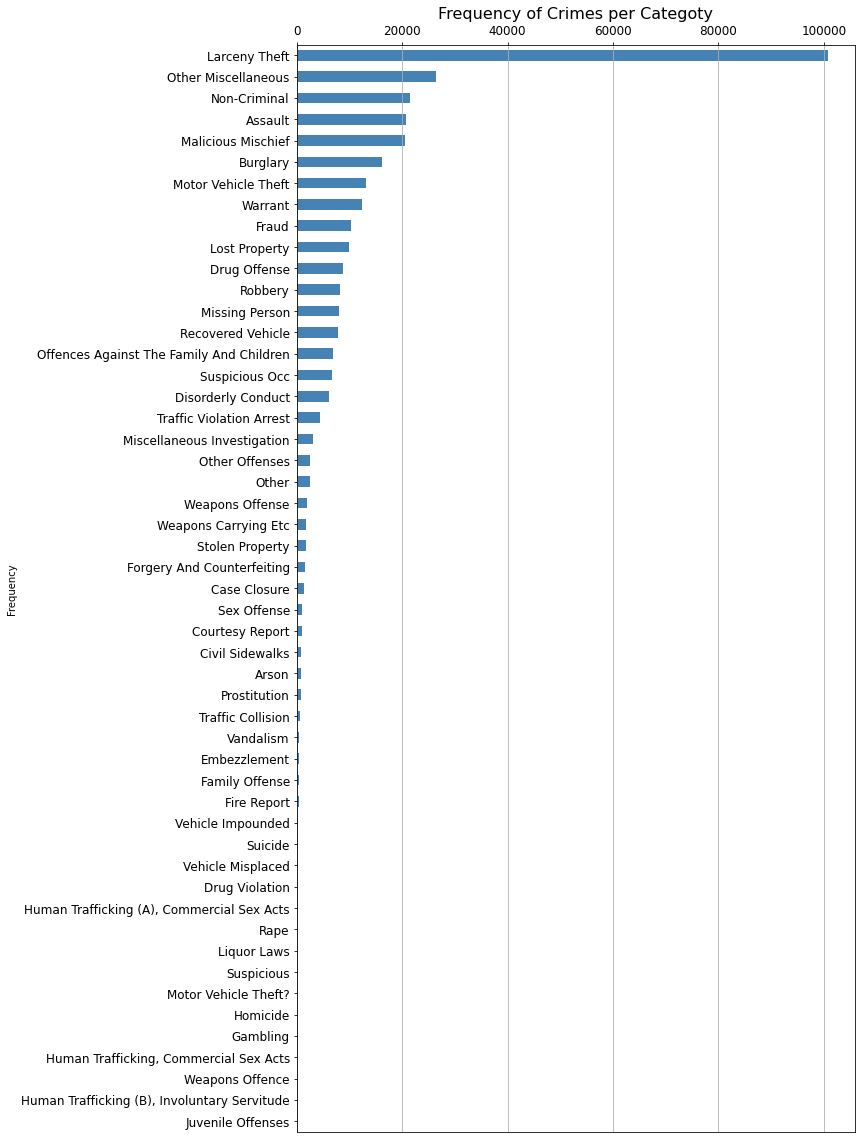

In [0]:
#df_category.sort_values('Incident Category',ascending=True,inplace=True)

ax = df_category.plot(kind='barh',figsize=(10,20),color='steelblue')
ax.set_title('Frequency of Crimes per Categoty',fontsize=16)
ax.set_yticklabels( df_category['Incident Category'],fontsize=10)
ax.set_ylabel('Frequency')
ax.tick_params(labelsize=12)

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.xaxis.grid(True)
ax.get_legend().remove()

#plt.savefig('plt_1.png',bbox_inches='tight')

#### **Time Crime Incident - Year/Month/Time/Day analysis**

__Month__

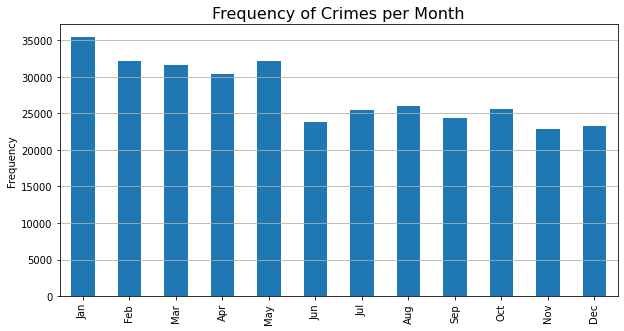

In [0]:
import calendar

df_month = pd.DataFrame(df_Police['Incident Month'].value_counts()).reset_index()
df_month.sort_values('index',ascending=True,inplace=True)

ax = df_month.plot(kind='bar',figsize=(10,5))
ax.set_title('Frequency of Crimes per Month',fontsize=16)
ax.set_xticklabels( df_month['index'].apply(lambda x: calendar.month_abbr[int(x)]),fontsize=10)
ax.set_ylabel('Frequency')
ax.tick_params(labelsize=10)

ax.yaxis.grid(True)
ax.get_legend().remove()

__Day__

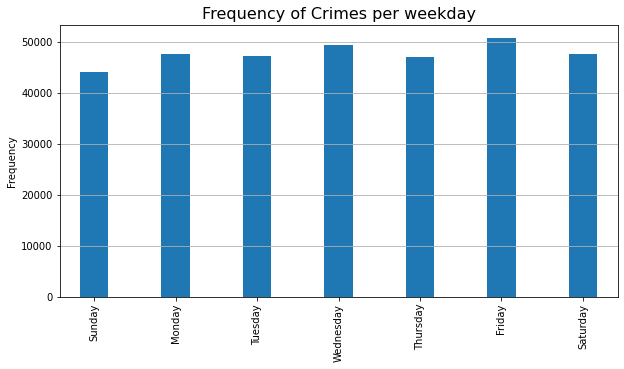

In [0]:
day_seq = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_day = pd.DataFrame(df_Police['Incident Day of Week'].value_counts()).reset_index()
df_day.sort_values('index',ascending=True,inplace=True)
df_day['index'] = pd.Categorical(df_day['index'], categories=day_seq, ordered=True)
df_day.sort_values('index',inplace=True)

ax = df_day.plot(kind='bar',figsize=(10,5),width=.35)
ax.set_title('Frequency of Crimes per weekday',fontsize=16)
ax.set_xticklabels( df_day['index'],fontsize=10)
ax.set_ylabel('Frequency')
ax.tick_params(labelsize=10)

ax.yaxis.grid(True)
ax.get_legend().remove()

__Time of the Day__

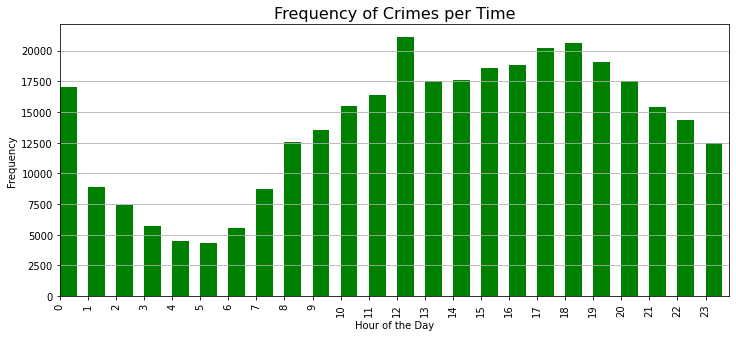

In [0]:
df_time = pd.DataFrame(pd.to_datetime(df_Police['Incident Time'], errors='coerce').dt.hour)
df_time = pd.DataFrame(df_time['Incident Time'].value_counts()).reset_index().sort_values('index')

ax = df_time.plot(kind='bar',figsize=(12,5),color='g',width = 1.2)
ax.set_title('Frequency of Crimes per Time',fontsize=16)
ax.set_xticklabels( df_time['index'],fontsize=10)
ax.tick_params(labelsize=10)
ax.set_xlabel('Hour of the Day',fontsize=10)
ax.set_ylabel('Frequency',fontsize=10)
ax.set_xlim(0)
ax.yaxis.grid(True)
ax.get_legend().remove()

__Year__

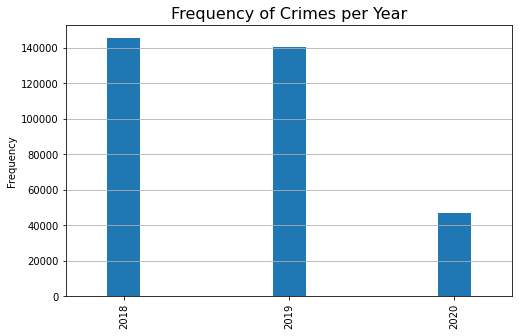

In [0]:
df_year = pd.DataFrame(df_Police['Incident Year'].value_counts())

ax = df_year.plot(kind='bar',figsize=(8,5),width=0.2,align='center')
ax.set_title('Frequency of Crimes per Year',fontsize=16)
ax.set_xticklabels( df_year.index,fontsize=10)
#ax.set_xlabel('Year',fontsize=10)
ax.set_ylabel('Frequency')
ax.tick_params(labelsize=10)

ax.yaxis.grid(True)
ax.get_legend().remove()

**Crime Frequency on Different WeekDays**

In [0]:
df_time_Day = df_Police[['Incident Time','Incident Day of Week']]
df_time = pd.DataFrame(pd.to_datetime(df_Police['Incident Time'], errors='coerce').dt.hour).rename(columns={'Incident Time':'TimeH'})
df_time_Day = pd.concat([df_time_Day,df_time],axis=1)

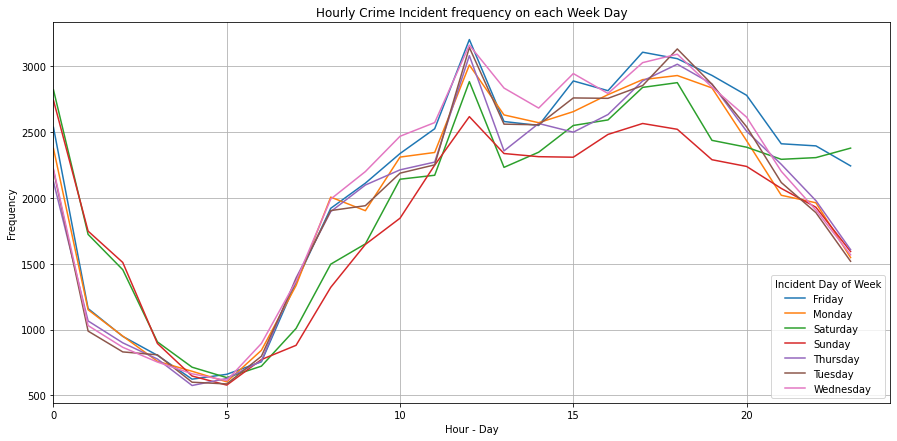

In [0]:
df_time_Day_group= df_time_Day.groupby(['TimeH','Incident Day of Week']).count()['Incident Time'].unstack()
fig, ax = plt.subplots(figsize=(15,7))
df_time_Day_group.plot(ax=ax)
ax.set_title('Hourly Crime Incident frequency on each Week Day')
ax.set_xlabel('Hour - Day')
ax.set_ylabel('Frequency')
ax.set_xlim(0)
ax.grid()

---
__Crime per Police District__

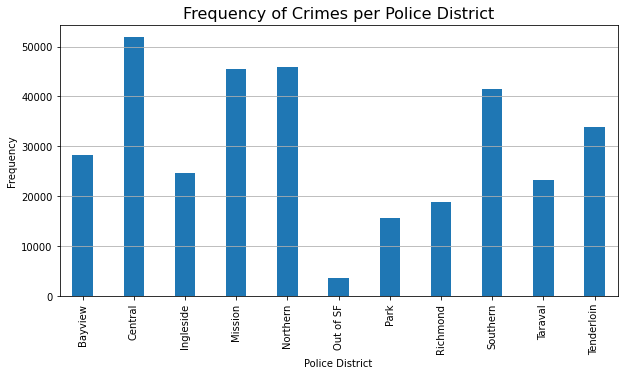

In [0]:
df_district =pd.DataFrame(df_Police['Police District'].value_counts()).reset_index()
df_district.sort_values('index',inplace=True)
df_district

ax = df_district.plot(kind='bar',figsize=(10,5),width=0.4)
ax.set_title('Frequency of Crimes per Police District',fontsize=16)
ax.set_xticklabels( df_district['index'],fontsize=10)
ax.set_xlabel('Police District',fontsize=10)
ax.set_ylabel('Frequency')
ax.tick_params(labelsize=10)

ax.yaxis.grid(True)
ax.get_legend().remove()

---
### Populate a word-cloud to understand the most occuring crime types

/bin/bash: conda: command not found


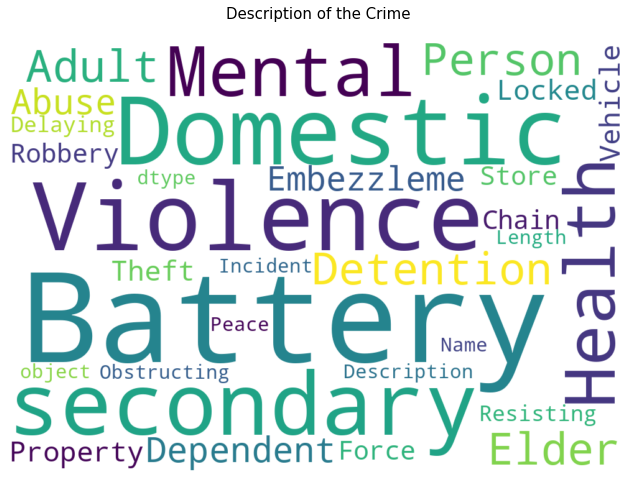

In [50]:
#Install Word-Cloud if not available
!conda install -c conda-forge wordcloud --yes

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopWords = set(STOPWORDS)
stopWords.add('Found')

wc = WordCloud(background_color = 'white', max_words=20000, width = 1000, height =700, stopwords=stopWords)
wc.generate(str(df_Police['Incident Description']))
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Description of the Crime\n', fontsize = 15)

plt.show()

---
# 4.	Modelling

__Pre-Processing__

Filtering relevant features to X and Y arrays

In [0]:
X = df_Police[['Incident Datetime','Police District','Latitude','Longitude']].values
y = df_Police['Incident Category'].values
print(X[:5])
print(y[:5])

[['2019/05/01 01:00:00 AM' 'Taraval' 37.76256939715695
  -122.49962745519908]
 ['2019/06/22 07:45:00 AM' 'Southern' 37.7805353858225
  -122.40816079455212]
 ['2019/06/03 04:16:00 PM' 'Bayview' 37.72159985216247
  -122.39074534279013]
 ['2018/11/16 04:34:00 PM' 'Central' 37.79485953222834
  -122.40487561154785]
 ['2019/05/27 02:25:00 AM' 'Northern' 37.79771621229674
  -122.43055896140595]]
['Offences Against The Family And Children' 'Non-Criminal'
 'Missing Person' 'Offences Against The Family And Children' 'Assault']


Pre processing the Data - Features in X

In [0]:
from sklearn.preprocessing import LabelEncoder

Label_Encoder = LabelEncoder()
X[:,0]=Label_Encoder.fit_transform(X[:,0])
Label_Encoder.fit(['Bayview','Central','Ingleside','Mission','Northern','Out of SF','Park','Richmond','Southern','Taraval','Tenderloin'])
X[:,1]=Label_Encoder.fit_transform(X[:,1])

Splitting Test and Train Data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Training Data size for X :{}\nTesting Data size for X :{}\n'.format( X_train.shape,X_test.shape))
print ('Training Data size for y :{}\nTesting Data size for y :{}\n'.format( y_train.shape,y_test.shape))

Training Data size for X :(233229, 4)
Testing Data size for X :(99956, 4)

Training Data size for y :(233229,)
Testing Data size for y :(99956,)



**K-Nearest Neighbour**
___

In [0]:
#Finding K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score

Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.24718876305574453 with k= 9


It is found that the accuracy is higher = 0.25 when k is 9

Prediction

In [0]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)

In [0]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_KNN))
print("F1  Accuracy : ", metrics.f1_score(y_test, yhat_KNN, average='weighted'))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_KNN))

Train set Accuracy :  0.354685738051443
Test set Accuracy :  0.24718876305574453
F1  Accuracy :  0.17138718298316208
Jaccard Similarity Score :  0.24718876305574453


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**Decision Tree**
***

In [0]:
from sklearn.tree import DecisionTreeClassifier
cat_Tree = DecisionTreeClassifier(criterion="gini", max_depth = 80)

cat_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=80, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction

In [0]:
pred_Tree = cat_Tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_Tree))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, pred_Tree))

DecisionTrees's Accuracy:  0.24465764936572093
Jaccard Similarity Score :  0.24465764936572093


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:
#X = df_Police[].values

'''
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "cat_tree.png"
featureNames = ['Incident Datetime','Police District','Latitude','Longitude']
targetNames = df_Police["Incident Category"].unique().tolist()
out=tree.export_graphviz(cat_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  
                         special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

'''

'\nfrom sklearn.externals.six import StringIO\nimport pydotplus\nimport matplotlib.image as mpimg\nfrom sklearn import tree\n%matplotlib inline \n\ndot_data = StringIO()\nfilename = "cat_tree.png"\nfeatureNames = [\'Incident Datetime\',\'Police District\',\'Latitude\',\'Longitude\']\ntargetNames = df_Police["Incident Category"].unique().tolist()\nout=tree.export_graphviz(cat_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  \n                         special_characters=True,rotate=False)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png(filename)\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation=\'nearest\')\n\n'

___
**Logistic Regression**
***

In [0]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(233229, 4) (233229,)
(99956, 4) (99956,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [0]:
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_LR))
print("Regression F1  Accuracy : ", metrics.f1_score(y_test, yhat_LR, average='weighted'))
print("Log Loss : ", log_loss(y_test, yhat_prob))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_LR))

Train set Accuracy :  0.3032513109433218
Test set Accuracy :  0.301312577534115
Regression F1  Accuracy :  0.13953491412845728
Log Loss :  2.817651886914775
Jaccard Similarity Score :  0.301312577534115


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**Support Vector Machine**
***

In [0]:
# from sklearn import svm
# clf=svm.SVC(kernel='rbf')
# clf.fit(X_train,y_train)
# yhat_svm = clf.predict(X_test)

In [0]:
# print("Train set Accuracy : ", metrics.accuracy_score(y_train, clf.predict(X_train)))
# print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_svm))
# print("Regression F1  Accuracy : ", metrics.f1_score(y_test, yhat_svm, average='weighted'))
# print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_svm))

___
## Plot the points on Map
___

In order to plot the incident map in the neighbourhood, we can make use of the latitude longitude data

In [0]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

In [0]:
df_Police_Short = df_Police.head(200)

In [0]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco City are 37.7790262, -122.4199061.


In [36]:
# add markers to map
# instantiate a feature group for the incidents in the dataframe
map_SF = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_Police_Short.Latitude, df_Police_Short.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_Police_Short.Latitude)
longitudes = list(df_Police_Short.Longitude)
labels = list(df_Police_Short['Incident Category'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_SF)    
    
# add incidents to map
map_SF.add_child(incidents)

In [37]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
map_SF = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_SF)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_Police_Short.Latitude, df_Police_Short.Longitude, df_Police_Short['Incident Category']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
map_SF

--------------
------------

# Using Fourquare to visualize businesses venues

We will make calls to the Foursquare API for different purposes. You will construct a URL to send a request to the API to search for a specific type of venues, to explore a particular business venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.


In [38]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [0]:
CLIENT_ID = 'INHYLUFFXJR2LZILTPSQJYV4JQYNEQUFZKNWMQ10CWHAEWJR' # your Foursquare ID
CLIENT_SECRET = 'RH2ADKJBT5GL21C1UV5H44HRC3QTQPWBZFYIU5KODVDOA24M' # your Foursquare Secret
VERSION = '20180605'
LIMIT=100

We will use the same data frame that we used to plot the geo-location data of crimes.
For an example, lets find the Crime Incident of theft, which is 

In [40]:
df_Theft= df_Police_Short.loc[df_Police_Short['Incident Category'].str.contains('Vehicle Theft')]
df_Theft.head(3)

,Incident Datetime,Incident Date,Incident Time,Incident Month,Incident Year,Incident Day of Week,Incident Category,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude
47,2019/08/21 02:00:00 PM,2019/08/21,14:00,08,2019,Wednesday,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,BUENA VISTA AVE EAST \ BUENA VISTA AVE \ BUENA...,Park,Haight Ashbury,37.769007,-122.438338
99,2018/11/11 09:20:00 AM,2018/11/11,09:20,11,2018,Sunday,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,CLARA ST \ 05TH ST,Southern,South of Market,37.779459,-122.402377
117,2020/05/23 06:30:00 PM,2020/05/23,18:30,05,2020,Saturday,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,MASON ST \ BEACH ST,Central,North Beach,37.807483,-122.413975


**Explore the Area of Theft and venues nearby**

Lets assume that this location is a theft prone area as per the analysis. Lets try to explore the area and find any venues within 100m radius

In [0]:
neighborhood_latitude = df_Theft.iloc[2][12]
neighborhood_longitude = df_Theft.iloc[2][13]
#Choesn Central Neighbouthood

In [42]:
radius = 100 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=INHYLUFFXJR2LZILTPSQJYV4JQYNEQUFZKNWMQ10CWHAEWJR&client_secret=RH2ADKJBT5GL21C1UV5H44HRC3QTQPWBZFYIU5KODVDOA24M&v=20180605&ll=37.80748251193778,-122.41397500878729&radius=100&limit=100'

In [0]:
results = requests.get(url).json()
#results

In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Hot Spud,Restaurant,37.807800,-122.413997
1,Big Bus Tours,Tour Provider,37.808323,-122.414126
2,Hotel Zephyr San Francisco,Hotel,37.807763,-122.413222
3,Tower Tours San Francisco,Tour Provider,37.807532,-122.413749
4,Alamo Rent A Car,Rental Car Location,37.807722,-122.414738


In [48]:
venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=20) # generate map centred around the Hotel

# add a red circle marker to represent the Hotel
folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup='Crime Incident',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map